<a href="https://colab.research.google.com/github/edwardauron/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

(-0.5, 4)

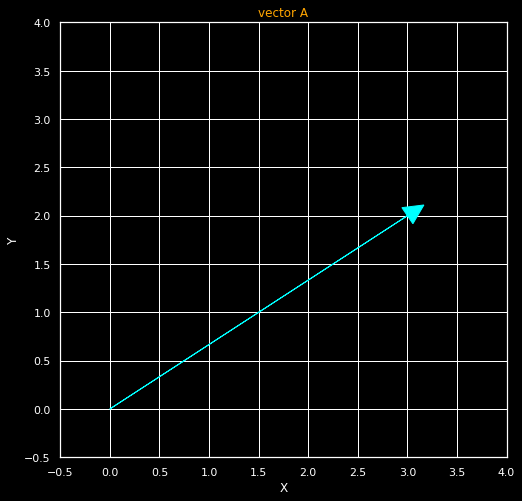

In [117]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

vector_a  = np.array([3, 2])

plt.arrow(0,0, vector_a[0], vector_a[1], head_width=.2, head_length=0.2, 
          color ='cyan')

plt.title('vector A')
plt.ylabel('Y')
plt.xlabel('X')

plt.xlim(-.5, 4)
plt.ylim(-.5, 4)

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [118]:
vector_b = np.array([17, -4, -2, 1])

np.linalg.norm(vector_b)

# mathematically, it's taking the square root of a set of vectors squared in n dimensions

# basically, it's the length of a set of vectors in a vector space.

17.60681686165901

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [119]:

vector_c = np.array([3, 7, -2, 12])
vector_d = np.array([9, -7, 4, 6])

dot_product = np.dot(vector_c, vector_d)
dot_product

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [120]:
matrix_e = np.matrix('7, 4, 2; 1, 3, -1; 2, 6, -4')

e_inverse = np.linalg.inv(matrix_e)
e_transposed = np.transpose(matrix_e)

print('inverse E: \n', e_inverse, '\n\n transposed E: \n', e_transposed)

inverse E: 
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]] 

 transposed E: 
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [121]:
import pandas as pd
import math

customers = np.array([820, 760, 1250, 990, 1080, 1450, 1600])
snow = np.array([0, 1, 7, 1, 0, 6, 4])

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [122]:
##### Your Code Here #####

c_mean = np.mean(customers)
c_variance = np.var(customers, ddof=0)
c_std = np.std(customers)

s_mean = np.mean(snow)
s_variance = np.var(snow, ddof=0)
s_std = np.std(snow)


print('Means of customers and snow: ', c_mean, s_mean)
print('Variance of customers and snow: ', c_variance, s_variance)
print('Standard Deviation of customers and snow: ', c_std, s_std)

Means of customers and snow:  1135.7142857142858 2.7142857142857144
Variance of customers and snow:  84653.06122448981 7.346938775510203
Standard Deviation of customers and snow:  290.95199127087926 2.7105237087157534


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [123]:
variance_scale = c_variance/s_variance

print(variance_scale)

11522.222222222224


The variance of customers is incredibly more large than the variance of inches in snow, so it's not really comparable. The scale is too great.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [124]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [125]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Country,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,England,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,Wales,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,Scotland,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,North Ireland,209,93,674,1033,143,586,355,187,334,1506,139


In [126]:
# Only numeric columns in dataframe for pasing to PCA

X = df.drop('Country', axis=1)
X.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139


I chose to use RobustScaler instead of StandardScaler after reading this https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
it seems StandardScaler can skew the results in the presence of outliers, and I definitely had an outlier in my plot, so i went back and changed my scaler

In [0]:
##### Your Code Here #####

from sklearn.preprocessing import RobustScaler 
from sklearn.decomposition import PCA

scaler = RobustScaler()
x_standard = scaler.fit_transform(X)

y = df['Country']






## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [128]:
##### Your Code Here #####

pca = PCA(4)

pca_1 = pca.fit_transform(x_standard)
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)




 Eigenvectors: 
 [[-0.27834239 -0.28544929  0.36889051 -0.15683566 -0.48853718 -0.22906409
  -0.07063193 -0.21900006 -0.24935391  0.11882294 -0.15314268 -0.23728704
  -0.2229371  -0.17935201 -0.13938493  0.14187722 -0.24248355]
 [ 0.14659796 -0.25609687  0.02597539 -0.45353133  0.33688146  0.09776681
  -0.39346912 -0.06577552  0.01199164 -0.35186294 -0.09419477  0.0292659
  -0.14344752  0.37829026 -0.12422157  0.26061331 -0.20893715]
 [-0.15020591 -0.09296605  0.18284612 -0.34110916  0.32102453 -0.23743829
  -0.21032027  0.21054203  0.25140079 -0.01630165  0.2748048  -0.27925955
   0.12019973 -0.4709576   0.26197554 -0.22076323  0.02056166]
 [ 0.66796123  0.54378198  0.34387048 -0.18671922 -0.0683979  -0.08169709
  -0.01087268 -0.00391282 -0.00610645  0.08062924 -0.12926366 -0.04366228
   0.00186992 -0.18212141 -0.05190107  0.07915776 -0.16200785]]

 Eigenvalues: 
 [1.30435947e+01 4.54520669e+00 1.08283938e+00 5.88580244e-31]


In [129]:
y.unique()

array(['England', 'Wales', 'Scotland', 'North Ireland'], dtype=object)

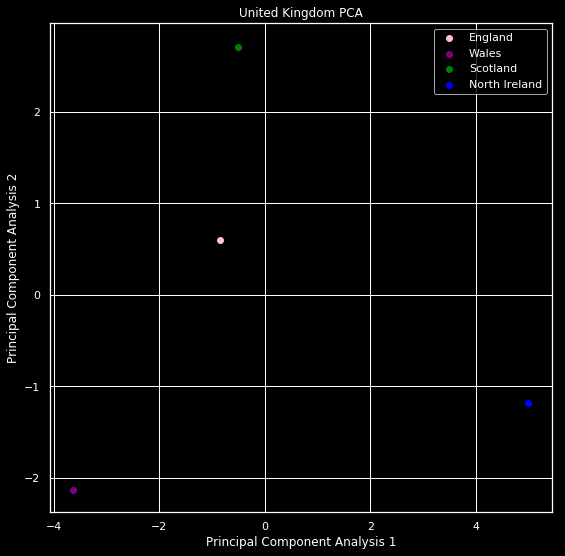

In [131]:

import matplotlib
from matplotlib.pyplot import figure

plt.style.use(['dark_background'])

pca_complete = pca.transform(x_standard)

y_colors = y.map({'England':'pink','Wales' :'purple', 'Scotland':'green', 
                  'North Ireland': 'blue'})
y_labels = ['England', 'Wales', 'Scotland', 'North Ireland']

colors = ['pink', 'purple', 'green', 'blue']

pca_figure, pca_axis = plt.subplots(figsize=(9, 9))

pca_axis.set_title('United Kingdom PCA')

for colors, labels in zip(colors, y_labels):
  pca_axis.scatter(pca_complete[:,0][y==labels], pca_complete[:,1][y==labels], 
                   c=colors, label=labels)


pca_axis.set_xlabel('Principal Component Analysis 1')
pca_axis.set_ylabel('Principal Component Analysis 2')

pca_axis.legend()

plt.show();

Looking at the PCA North Ireland has a really high display of variance, and if we go back and look at our data, we can probably find that somewhere.


# Potatoes strike again!

Seems like Ireland eats many more potatoes than the other three, and less of many other things.
This feels like a bit of a *cough* seeded *cough* example, because we have such nice defined labels for our food/drink consumption, but if we didn't have labels, we'd at least know there is a higher spread of variance in our features in Northern Ireland than the other three countries, and that would give us a starting idea for where to start combing through data and modeling to account for the outlier.

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [0]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

In [0]:
##### Your Code Here #####

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
kmeans_standard = scaler.fit_transform(points)

In [165]:
import  matplotlib.font_manager
flist = matplotlib.font_manager.get_fontconfig_fonts()
names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
print(names)

['Liberation Sans', 'Liberation Mono', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'Liberation Sans', 'Liberation Mono', 'Liberation Serif', 'Liberation Sans', 'Liberation Serif', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Serif', 'Liberation Sans Narrow', 'Liberation Mono', 'Liberation Serif', 'Liberation Mono']


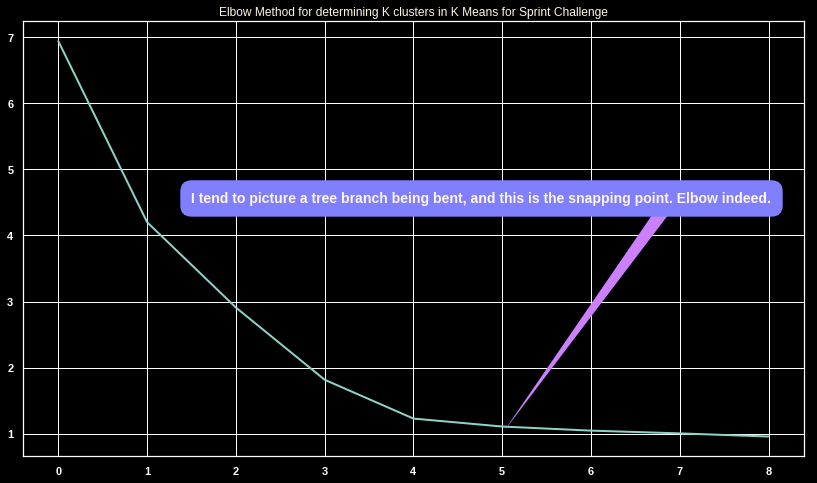

In [247]:
# determine number of clusters

from scipy import cluster
from matplotlib.patches import Ellipse

initial = [cluster.vq.kmeans(points,i) for i in range(1,10)]


matplotlib.rcParams['text.color'] = 'oldlace'
font = {'family' : 'Liberation Sans',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

plt.figure(figsize=(14, 8))

el = Ellipse((4, -1), 0.2, 0.5)

ax.add_patch(el)


plt.annotate('I tend to picture a tree branch being bent, and this is the snapping point. Elbow indeed.', 
             xy=(5, 1), xytext=(1.5, 4.5),
             
             bbox=dict(boxstyle="round", pad=0.8, fc=(0.5, 0.5, 1), ec="none"),
                  arrowprops=dict(arrowstyle="wedge,tail_width=1",
                                  fc=(0.8, .5, 1), ec="none",
                                  patchA=None,
                                  patchB=el,
                                  relpos=(0.83, 0.6)))

plt.plot([var for (cent,var) in initial], linewidth=2)
plt.title('Elbow Method for determining K clusters in K Means for Sprint Challenge')


plt.show()


In [0]:
# i chose to use five clusters because if i bent my elbow anymore it'd snap...
kmeans = KMeans(n_clusters=5)
kmeans.fit(points)
labels = kmeans.labels_

print(labels)

In [0]:
points['clusters'] = labels

In [0]:
points.head()

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


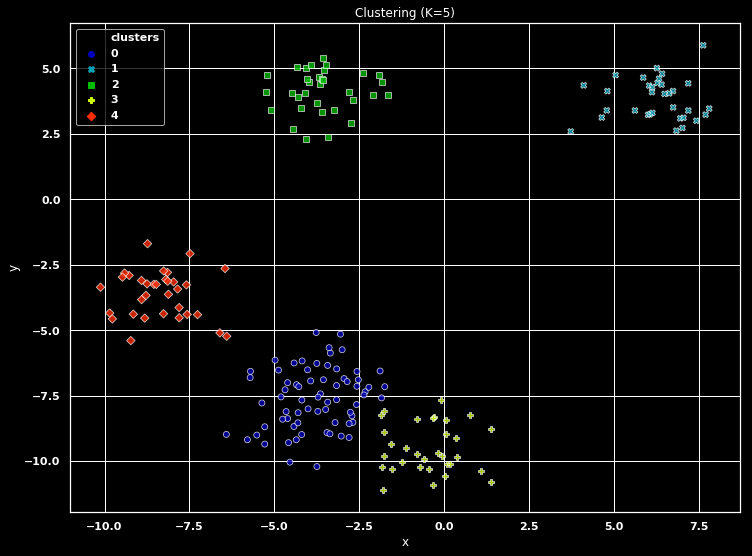

In [249]:
# restart runtime after exucting this codeblock the first time

!pip install seaborn==0.9.0 -q 
import seaborn as sns; sns.set()


plt.style.use(['dark_background'])

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)


fig, ax = plt.subplots(figsize=(12,9))


palette = sns.color_palette("nipy_spectral", 5)

sns.scatterplot(ax=ax, x='x', y='y', 
                data=points, 
                hue='clusters',
                style='clusters',
                alpha=0.8,
                palette=palette,
                legend='full')

ax.set_title('Clustering (K=5)')

plt.show();